# <b><p style="color:##FF8000;"> Proyecto de Programación en Python: Gestión de World-Com</p><b>

Este proyecto se enmarca dentro del Master de Big Data and Business Analytics de la UCM. 
El proposito es gestionar las facturas de una compania de comunicaciones a nivel mundial. En este trabajo, se tienen en cuenta 5 paises de su cartera de clientes: A,B,C,D,E. 


Este trabajo consiste en dos partes:

A) Generacion del fichero de llamadas del primer trimestre de 2020.

B) Contabilizacion y analisis de estas llamadas.

Cada apartado explica una parte del fichero y como se ha generado, o bien, que analisis y contabilizacion se realiza.
En cada uno de ellos se explica la funcion y hay un ejemplo de lo que genera cada una.


<p style="color:##cc0000;"> NOTA: Los apartados siguientes desarrollan cada punto de los dos apartados del ejercicio. A excepcion del punto 3 y 6 ya que la programacion de MAPREDUCE dentro de Jupyter no es tecnicamente posible y manejar las variables de sistema para generar el fichero da error. Por tanto, el apartado 6 se deja comentado el codigo como 'Markdown'. 
Todas las funciones aqui descritas estan en los diferentes ficheros.py

#### En primer lugar, vamos a importar todas las funciones que se utilizaran a lo largo de todos los apartados en el ejercicio.

In [5]:
#importamos las librerias que vamos a utilizar.
import random as random
# importamos la libreria de random para generar numeros aleatorios
import datetime
import time
from datetime import timedelta
#importamos datetime y timedelta para manejar tiempo
import pandas as pd
#importamos pandas para manejar dataframes 
import numpy as np
#importamos numpy para manejar arrays
import csv
#importamos la funcion csv para crear y cargar los datos a/desde un fichero CSV
from bs4 import BeautifulSoup as bs
#importamos la funcion BeautifulSoup para efectuar el webscrapping
import requests as req
#importamos la funcion request para efectuar el webscrapping
try:
    import nltk
    from nltk.corpus import stopwords
    nltk.download('stopwords')
except:
    from stop_words import get_stop_words
#importamos la lista de stopwords desde la libreria nltk y si falla la funcion get_stop_words y stop_words para
#procesar la informacion y eliminar las palabras del corpus que no queremos
import matplotlib.pyplot as plt
#importamos matplotlib.pyplot para poder realizar los graficos
import math
#importamos la funcion math para manejar numeros
import sys

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/Cristian/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


## PARTE A. Generacion de los datos de Prueba
    

### Punto 1. Generacion claves de los clientes que realizan la llamada
Preparación de las distintas piezas para la generacion de las claves de cliente.

#### Apartado 1(a).
Funcion que genera una clave dando la misma probabilidad a cada pais y los tres digitos.

In [3]:
# A1a_Genera_clave_simple.py
def generaclavecliente_misma_probabilidad(y):
    """ 
    Esta funcion que genera la clave de dos clientes que posteriormente estaran en la llamada registrada,
    siendo el numero de llamadas '(y)' que vamos a generar. 
    la clave del cliente se compone de la letra del pais en el que reside el cliente y 3 digitos que van
    del 0 a 9 que componen el numero de la clave. 
    Tanto la letra como los digitos tiene la misma probabilidad de 0 a 9. Que juntandolos pueden ir del 000 a 999.
    
    Parameters
    ----------
    y= Numero de par de codigos de clientes. 
    las claves de los paises estan en el fichero de proyecto Paises-Clientes. Para generar la clave 
    solo utilizaremos las letras del pais del Data Frame.
    
    Return
    ----------
    string
    una lista de 'y' valores aleatorios que componen la clave de llamada.
    Por un lado utiliza una lista de los nombres de los paises "Paises" y por otro los numeros que componen
    la clave de llamada "clavellamada"
    
    Example 
    -----------------------
    generaclavecliente"(1)""
     # D-677 # A-421 #
    """
    #cargamos nuestro fichero
    ficheroPaises= 'Paises_Clientes.csv' 
    tablapaises=pd.read_csv(ficheroPaises)
    Paises=list(tablapaises.head(5))
    #clavellamada=[]
    for i in range(0,y):
        codLetra=np.random.choice((Paises))
        codNum1=np.random.randint(0,9)
        codNum2=np.random.randint(0,9)
        codNum3=np.random.randint(0,9)
        codLetra2=np.random.choice((Paises))
        codNum4=np.random.randint(0,9)
        codNum5=np.random.randint(0,9)
        codNum6=np.random.randint(0,9)
        codEmisor=(codLetra+"-"+str(codNum1)+str(codNum2)+str(codNum3))
        codReceptor=(codLetra2+"-"+str(codNum4)+str(codNum5)+str(codNum6))
        if codLetra!=codLetra2:
            clavellamada=(" # "+codEmisor+" # "+codReceptor+" # ")
            print(clavellamada)

In [22]:
generaclavecliente_misma_probabilidad(1)

 # E-117 # B-802 # 


#### Apartado 1(b) y 1(c).
Funcion que genera una clave teniendo en cuenta el numero de clientes de cada pais y generando tanto el id del Emisor como el del Receptor de forma aleatoria del 'pool' de clientes de la compania en cada pais.
La funcion tiene en cuenta que un llamante del pais 'A' tiene mas probabilidades que 'B' en salir en el archivo. Una vez, elegido el pais la funcion tiene en cuenta esto para generar elegir un cliente de su pool correspodiente de forma aleatoria.
Ademas, la funcion descarta que se eliga dos veces en una llamada el mismo cliente. 

In [4]:
# A1bc_Generar_Clave_Cliente_aleatoria.py
def genera_clave_cliente_aleatoria():
    
    """ 
    la función genera_clave_cliente_aleatoria dara como resultado un par de codigos de cliente. 
    Es decir, genera una clave para quien emite la llamada y quien la recibe, generando un codigo 
    de cliente para cada tipo de llamada,respectivamente.
    En este caso, se selecciona el pais del emisor y receptor en funcion de la poblacion, dando mas probabilidad
    a el pais con mas poblacion y con una probabilidad proporcional a la poblacion de cada uno sobre el 
    total de individuos en la muestra. Ademas, el numero del cliente es unico y elegimos al azar el cliente
    del registro de la empresa.
    Este codigo tiene en cuenta los planes de expansion de la compania y si se incorpora un cliente solamente
    necesitara anadir una linea mas de codigo en las partes de la funcion de generacion de numeros de cliente y
    eleccion aleatoria siguiendo la secuencia en los indices de la lista.
    
    
    Parameters
    ----------------------------
    no tiene parameters
    
    Return
    ---------------------------------
    string
    Devuelve "clavellamada" codigos de llamada de cada tipo (emisor y receptor).
    
    Example
    ----------------
    >>> genera_clave_cliente_aleatoria()
    'D-018 # E-370 # '
    
    """  
    tablapaises=pd.read_csv('Paises_Clientes.csv')
    tablapaises['Total']= tablapaises.sum(axis=1)
    frec=list(tablapaises.values)
    poblacion=list(frec[0])
    #----------------------#
    i=0
    j=(len(poblacion)-1)
    frecuenciapoblacion=[]
    for x in poblacion:
        if i < j:
            frecuenciapoblacion.append((poblacion[i]/poblacion[j]))
        i=i+1
    #print("suma de probabilidades de cada letra de pais:"sum(frecuenciapoblacion)) #control de probabilidad
    
    # generamos el pool de clientes. Para ello, utilizamos la poblacion registrada y creamos los codigos de 
    #cliente segun dicha poblacion registrada en cada pais. Dando un numero secuencial a cada cliente.
    # Tambien utilizamos la inforamacion misma del fichero para generar su numero de forma que si se incorpora
    #un pais en sus planes de expasion se pueda incorporar facilmente una linea mas para generar sus codigos
    
    codigo_num_clientepaisA=[ "A"+"-"+str(numero).zfill(3) for numero in range(1,poblacion[0]+1)]
    codigo_num_clientepaisB=[ "B"+"-"+str(numero).zfill(3) for numero in range(1,poblacion[1]+1)]
    codigo_num_clientepaisC=[ "C"+"-"+str(numero).zfill(3) for numero in range(1,poblacion[2]+1)]
    codigo_num_clientepaisD=[ "D"+"-"+str(numero).zfill(3) for numero in range(1,poblacion[3]+1)]
    codigo_num_clientepaisE=["E"+"-"+str(numero).zfill(3) for numero in range(1,poblacion[4]+1)]
    
    #guardamos todos los codigos en un pool de clientes total
    lista_codigos=[codigo_num_clientepaisA,
                   codigo_num_clientepaisB,
                   codigo_num_clientepaisC,
                   codigo_num_clientepaisD,
                   codigo_num_clientepaisE]

    #iteraremos de forma que eligamos del pool de clientes un par de clientes como emisor y receptor de forma
    #aleatoria 
    
    for i in range(1):
        lista_codigoEmisor=np.random.choice((lista_codigos),p=(frecuenciapoblacion))
        if lista_codigoEmisor[1][0] == "A":
            codEmisor=lista_codigoEmisor[(random.randint(0,(poblacion[0]-1)))]
        if lista_codigoEmisor[1][0] == "B":
            codEmisor=lista_codigoEmisor[(random.randint(0,(poblacion[1]-1)))]
        if lista_codigoEmisor[1][0] == "C":
            codEmisor=lista_codigoEmisor[(random.randint(0,(poblacion[2]-1)))]
        if lista_codigoEmisor[1][0] == "D":
            codEmisor=lista_codigoEmisor[(random.randint(0,(poblacion[3]-1)))]
        if lista_codigoEmisor[1][0] == "E":
            codEmisor=lista_codigoEmisor[(random.randint(0,(poblacion[4]-1)))]
            
    for i in range(1):
        lista_codigoReceptor=np.random.choice((lista_codigos),p=(frecuenciapoblacion))
        if lista_codigoReceptor[1][0] == "A":
            codReceptor=lista_codigoReceptor[(random.randint(0,(poblacion[0]-1)))]
        if lista_codigoReceptor[1][0] == "B":
            codReceptor=lista_codigoReceptor[(random.randint(0,(poblacion[1]-1)))]
        if lista_codigoReceptor[1][0] == "C":
            codReceptor=lista_codigoReceptor[(random.randint(0,(poblacion[2]-1)))]
        if lista_codigoReceptor[1][0] == "D":
            codReceptor=lista_codigoReceptor[(random.randint(0,(poblacion[3]-1)))]
        if lista_codigoReceptor[1][0] == "E":
            codReceptor=lista_codigoReceptor[(random.randint(0,(poblacion[4]-1)))]


    if codEmisor!=codReceptor:
        clavellamadas=(" # "+str(codEmisor)+" # "+str(codReceptor)+" # ")
    while codEmisor==codReceptor:
    #print(codReceptor)
        for i in range(1):
            lista_codigoEmisor=np.random.choice((lista_codigos),p=(frecuenciapoblacion))
            if lista_codigoEmisor[1][0] == "A":
                codEmisor=lista_codigoEmisor[(random.randint(0,(poblacion[0]-1)))]
            if lista_codigoEmisor[1][0] == "B":
                codEmisor=lista_codigoEmisor[(random.randint(0,(poblacion[1]-1)))]
            if lista_codigoEmisor[1][0] == "C":
                codEmisor=lista_codigoEmisor[(random.randint(0,(poblacion[2]-1)))]
            if lista_codigoEmisor[1][0] == "D":
                codEmisor=lista_codigoEmisor[(random.randint(0,(poblacion[3]-1)))]
            if lista_codigoEmisor[1][0] == "E":
                codEmisor=lista_codigoEmisor[(random.randint(0,(poblacion[4]-1)))]
        for i in range(1):
            lista_codigoReceptor=np.random.choice((lista_codigos),p=(frecuenciapoblacion))
            if lista_codigoReceptor[1][0] == "A":
                codReceptor=lista_codigoReceptor[(random.randint(0,(poblacion[0]-1)))]
            if lista_codigoReceptor[1][0] == "B":
                codReceptor=lista_codigoReceptor[(random.randint(0,(poblacion[1]-1)))]
            if lista_codigoReceptor[1][0] == "C":
                codReceptor=lista_codigoReceptor[(random.randint(0,(poblacion[2]-1)))]
            if lista_codigoReceptor[1][0] == "D":
                codReceptor=lista_codigoReceptor[(random.randint(0,(poblacion[3]-1)))]
            if lista_codigoReceptor[1][0] == "E":
                codReceptor=lista_codigoReceptor[(random.randint(0,(poblacion[4]-1)))]
                
        clavellamadas=(" # "+str(codEmisor)+" # "+str(codReceptor)+" # ")

    print(clavellamadas)

In [27]:
#para comprobar que codigos genera la funcion:
for i in range(5):
    genera_clave_cliente_aleatoria()

 # E-145 # C-228 # 
 # C-099 # E-032 # 
 # D-097 # C-319 # 
 # A-043 # C-016 # 
 # E-141 # C-041 # 


#### Apartado 1(d).
NOTA: En los apartados anteriores se usa el fichero generado desde este apartado. 
Este codigo permite generar el fichero y en el caso de incorporar mas paises se puede hacer dentro de la funcion para actualizar el fichero o editando el csv con un editor de texto.

In [6]:
#A1d_Creacion_Fichero_Paises.py

#Por tanto, el siguiente procedimiento creara un archivo en disco y lo cargara para su visualizacion y uso.
def GenerarTablaPaises():
    """ 
    Este procedimiento generara un fichero con la poblacion y los nombres de paises que se guarda en disco
    como 'Paises_Clientes'. En la primera fila las letras mayusculas correspondientes a los paises
    y la segunda la poblacion de cada uno en numeros laterales.
    Si la compania desea actualizar la lista de paises y/o el numero de clientes puede ir a introducir en la lista
    de paises o poblacion en la funcion o desde el fichero csv.
    
    Parameters
    ----------
    no necesita parameters
    
    Return
    ----------
    fichero en disco guardado en la carpeta llamado de Paises_Clientes.csv
    y un dataframe llamado tablapaises
    
    """
    
    paises=['A', 'B', 'C', 'D', 'E']
    poblacion=[(300,100,500,250,150)]
    paises_df = pd.DataFrame(poblacion,columns=paises)
    paises_df
    paises_df.to_csv('Paises_Clientes.csv',header=True, index=False)
    
    "--------------"
    #cargamos el fichero y creamos un dataframe llamado tablapaises
    fichero='Paises_Clientes.csv'
    tablapaises=pd.read_csv(fichero)
    print(tablapaises)

#### Siguiendo las pautas dadas en la 'Descripcion de la prueba':
Generamos el resto de elementos del fichero de llamadas a excepcion de la coleccion de palabras que lo haremos en el apartado 2 de esta parte del proyecto. 
  

#### a) Generamos la fecha de llamada:

In [7]:
# A11_generafechacall.py

def generafechacall(y,z):
    
    """ 
    Funcion que genera fecha de establecimiento para cada llamada en un rango
    de y elementos en el primer trimestre del ano determinado 'z'. 
    
    Parameters
    ----------
    y= numero de elementos que se van generar
    z= ano sobre el que se quiere generar la muestra
    
    Return
    ----------
    string
    
    una lista de hasta "y" fechas aleatorios comprendidas entre el mes 1 y 3.
    para el ano que se determine como 'z'.
    
    Precondition
    ------------
    y > 0
    
    
    Example - Para el ejercicio generaremos 5000 ya que son las llamadas de la muestra
    -----
    
    #generafechacall(1,2020)
    '2020-03-25' # '
    
    """
    assert y > 0, "el numero de elementos a generar debe ser superior a 0"
    fechas=[]
    for i in range (y):
        
        codigo_mes=random.randint(1,3)
        if codigo_mes==2:
            codigo_dia=random.randint(1,29)
        else:
            codigo_dia=random.randint(1,30)
        if codigo_mes<=9:
            codigo_mes="0"+str(codigo_mes)
        else:
            codigo_mes
        if codigo_dia<=9:
            codigo_dia="0"+str(codigo_dia)
        else:
            codigo_dia
        fechas.append(str(z)+"-"+str(codigo_mes)+"-"+str(codigo_dia)+" # ")
    return(fechas)

#### b) Generamos la hora de la llamada:
Para darle un aspecto mas realista y como no hay un limite en la descripcion de la prueba he decidido generar las horas de las llamadas desde las 8 am hasta 23 horas.

In [7]:
#A12_generahoracall.py

def generahoracall(x,y):

    """ 
    Funcion que genera la hora de establecimiento para cada llamada desde x a y
    en nuestro caso sera de 0 a 5000 llamadas que se generan entre las 8 y 23 horas.
    
    Parameters
    ----------
    x= comienzo del intervalo
    y= final del intervalo
    
    Return
    ----------
    string
    un rango de 5000 valores aleatorios con la hora el establecimiento de llamada entre los valores de 8 y 23 horas 
    y 0-50 minutos
    
    Example - Para el ejercicio generaremos 5000 ya que son las llamadas de la muestra
    -----
    
    #generahoracall(0,1)
    18:23:00 # '
    """
    
    horacall=[] #hora del establecimiento de la llamada
    for i in range(x,y):
        # generamos la hora de establecimiento de llamada
        horasllam=timedelta(hours=(random.randint(8,23)),minutes=(random.randint(0,59))) 
        horas=(str(horasllam))
        hora_llamada=horas[0:5] #limpiamos los segundos, siguiendo el formato de la descripcion del ejercicio
        horacall.append(hora_llamada+" # ")
    return(horacall)

In [8]:
generahoracall(0,1)

['23:57 # ']

#### c) generamos la duracion de llamada bajo las dos opciones planteadas en el enunciado: 
        
c. a) uniforme entre 1 min y 59 min.

c. b) No uniforme distribuida alrededor de 5 min.

In [9]:
#A13_duracion_llamada.py

# c. a) Si lo queremos generar uniformemente entre un minuto y una hora:
def duracion_call_unif(x,y):

    """ 
    Funcion que genera la duracion para cada llamada, siendo el numero de llamadas el rango que va x a y
    en nuestro caso sera de 0 a 5000 llamadas que se generar entre las 1 hora y 59 minutos y 0-59 segundos.
    
    Parameters
    ----------
    x= comienzo del intervalo
    y= final del intervalo
    
    Return
    ----------
    string
    una lista de y valores aleatorios que son duraciones de llamada en minutos y segundos. 
    
    Example - Para el ejercicio generaremos 1.
    -----
    duracioncallunif"(0,1)""
    
    '0:02:07 # # # '
    """

    duracall=[] #hora del establecimiento de la llamada
    for i in range(x,y):
        # si generasemos la duracion de la llamada uniformemente, se podria hacer de la siguiente manera
        duracion=timedelta(hours=(random.randint(0,1)),minutes=(random.randint(1,59)),seconds=(random.randint(0,59)))
        duracall.append(str(duracion)+" # ")
    return(str(duracall))


In [144]:
duracion_call_unif(0,10)

"['0:49:12 # ', '0:47:41 # ', '0:35:47 # ', '0:48:05 # ', '0:30:51 # ', '1:53:34 # ', '0:48:50 # ', '0:46:20 # ', '0:45:51 # ', '1:05:55 # ']"

In [10]:
#A13_duracion_llamada.py

#c. b) No uniforme distribuida alrededor de 5 min.

def duracion_call_no_unif():
    """ 
    Funcion que genera la duracion para cada llamada, siendo el numero de llamadas '(y)',
    en nuestro caso sera de 5000 llamadas que se generaran con un valor central de 5 min y 0-59 segundos de manera 
    no uniforme.
    Ademas de graficar la distribucion de la frecuencia de los minutos de la llamada
    
    Parameters
    ----------
    
    
    Return
    ----------
    string
    una lista de y valores aleatorios que son duraciones de llamada en minutos y segundos. 
    
    Example - Para el ejercicio generaremos 10:
    -----
    dura_call_no_unif"(0,10)""
    
     ['# 05:57 # ',
     ' # 05:15 # ',
     ' # 07:33 # ',
     ' # 06:19 # ',
     ' # 04:09 # ',
     ' # 07:11 # ',
     ' # 05:36 # ',
     ' # 06:54 # ',
     ' # 03:10 # ',
     ' # 03:00 # ',
     ' # 04:26 # ',
     ' # 05:39 # ',
     ' # 04:46 # ',
     ' # 04:59 # ',
     ' # 04:35 # ']
    """
    duracion=[]
    for i in range(1):
        dh=str(datetime.time(0,(np.random.poisson(lam=5)),(random.randint(0,59))))
        duracion.append(str(dh[3:]))
   
    return(duracion)

In [14]:
for i in range(10):
    print(duracion_call_no_unif())

['05:32']
['05:34']
['05:03']
['04:20']
['07:26']
['07:27']
['04:25']
['09:08']
['03:09']
['05:27']


### Punto 2. Generar coleccion de palabras 
A continuacion, generamos la coleccion de palabras que vamos a utilizar para armar las conversaciones del programa espia. 

#### a) En primer lugar, formameros una coleccion de palabras haciendo webscrapping de la pagina web sugerida en el
documento: 
    https://es.wiktionary.org/wiki/Ap%C3%A9ndice:Palabras_m%C3%A1s_frecuentes_del_espa%C3%B1ol

In [11]:
#A2a_Webscrapping.py
def webscrapping():
    
    '''Esta funcion generar un fichero denominado "flistapalabras" con una lista de pares:"Palabra-Frecuencia". 
    para ello hacemos webscrapping de los elementos almacenados en una tabla 
    en la pagina web wikitionary.org definiendo su url dentro de la funcion. Para ello, se extraen los elementos
    se procesan como xlm y luego se limpia el fichero construyendo una lista a partir de la tabla almacenada en
    la pagina web.
    
    Parameters
    -----------------
    esta funcion no tiene parametros
    
    Return
    ------------------
    esta funcion devuelve un fichero csv con una lista de 1000 palabras y su frecuencia ordenada de mayor a menor.
    
    Example
    --------------------
    print(listapalabras[0])
    
    ('de', 40880)
    
    '''
    f_listapalabras=open("flistapalabras","w")
    
    # indicar la ruta
    url="https://es.wiktionary.org/wiki/Wikcionario:Frecuentes-(1-1000)-Subt%C3%ADtulos_de_pel%C3%ADculas"

    #extraer elementos
    webcontent=req.get(url).text

    #Procesar la informacion de la extracion como xlm
    content=bs(webcontent,"lxml")

    #Tenemos que pensar como llegar a los elementos de la tabla
    #como sacarlos y darles el formato adecuado
    #primero accedemos a la tabla y posteriormente a sus elementos
    
    #definimos esta tabla como tablaorg "\tabla origen"
    tablaorg=content.find('table',attrs={'class':'wikitable'})
    
    #iteramos hasta sacar todos los elementos de la tabla
    #al estar en varias tablas necesitaremos hacer lo mismo pero dos veces cambiando la tablaorg por la de la otra pagina
    palabra=""
    frecuencia=0
    nroFila=0
    listapalabras=[]
    for fila in tablaorg.find_all("tr"):
        if nroFila>=1:
            nroCelda=0
            for celda in fila.find_all('td'):
                if nroCelda==1:
                    palabra=celda.text.replace("\n","")
                if nroCelda==2:
                    frecuencia=int(celda.text)
                    listapalabras.append((palabra,frecuencia))
                nroCelda=nroCelda+1
        nroFila=nroFila+1
#-----------------------------------------------------------#
    #almacenamos el fichero y lo cerramos
    for letra,numero in listapalabras:
        f_listapalabras.write('\n'.join(["%s;%s" % (letra, numero)])+"\n")
    f_listapalabras.close()

#### 2a) Generaremos una lista de palabras eliminando aquellas que no tienen significado.
Aquellas denominadas como  "stopwords". 
Y almacenaremos este archivo de texto en disco con la palabra - frecuencia organizada de mayor a menor.
Esta lista se denomina 'Corpus_palabras'.

In [12]:
#A2b_Elimina_palabras.py
def eliminapalabras():
    """
    Esta funcion requiere de definir una lista de palabras que se quiere modificar eliminando algunas palabras
    para ello se necesita definir primero el conjunto de palabras que se van a modificar como 'conjuntodepalabras'
    y luego el listado de palabras que se quieren eliminar del conjunto como 'palabrasprohibidas'
    conjuntopalabras= lista de palabras que se reciben de entrada para modificar
    palabrasprohibidas= lista de palabras que se le eliminaran del conjunto de palabras
    
    Parameters
    --------------------------------------
    esta funcion no tiene parameters
    
    Return
    ---------------------
    list
    la función generara una lista nueva de palabras 'conjuntopalabras' que será el resultado
    de eliminar los elementos de la intersección entre el conjunto de palabras 
    y las palabras prohibidas. Se almacenara un fichero en el disco con las palabras
    de la lista 'conjuntopalabras' y devolvera el primer elemento de esa lista'
    
    Ejemplo
    ------------------
    eliminapalabras(0)
    ['si', '6927']
    """
    corpus=open('Corpus_palabras.txt',"w")
    with open('flistapalabras') as fichero:
        csv_reader = csv.reader(fichero, delimiter=';')
        listapalabras=[]
        for i in csv_reader:
            listapalabras.append(i)
        fichero.close()
    #print(listapalabras)

    #transformamos la lista de palabras del fichero para crear una lista de pares palabra-frecuencia de nuevo
    nuevo_conjunto_palabras=[] 
    for linea in listapalabras:
        palabra=linea[0]
        #print(palabra)
        numero=linea[1]
        par=[palabra,numero]
        nuevo_conjunto_palabras.append(par)
    
    #---------#
    
    #generamos la lista de palabras que vamos a eliminar del nuevo conjunto de palabras
    try:
        palabrasprohibidas = stopwords.words('spanish')
    except:
        palabrasprohibidas=get_stop_words('spanish')
    #print(palabrasprohibidas[1])
    
    
    #---------#
    
    #vamos a generar un nuevo conjuntopalabras con su frecuencia
    #con los elementos de la lista del conjunto de palabras que no son prohibidas 
    conjuntopalabras=[]                  
    for palabra in nuevo_conjunto_palabras:
        if palabra[0] not in palabrasprohibidas:
            conjuntopalabras.append(palabra)

    #escribimos el fichero en un archivo de disco
    
    for letra,numero in conjuntopalabras:
            corpus.write('\n'.join(["%s;%s" % (letra, numero)])+"\n")
    corpus.close()
    # Para ejemplificar un elemento de la lista de palabras, mostraremos la primera pareja:
    return(conjuntopalabras[0])

In [183]:
eliminapalabras()
# ejemplo de un elemento de elimina palabras

['si', '6927']

#### 2.b) En segundo lugar, generamos un programa para el mensaje
El programa generatext puede generara una conversacion de 5 a 25 palabras  que aparecera 
en cada linea de llamada.

In [15]:
#A2c_Genera_Mensaje_Text.py
def generatext():
    """
    Esta funcion permitira generar una lista de palabras significativas de una supuesta 
    conversacion de longitud entre 5 y 25 palabras por llamada. Este 'mensaje' se produce de elegir del 
    corpus generado y almacenado en el fichero txt en el disco llamado "Corpus_palabras.txt"
    
    Parameters
    --------------------------------------
    No tiene parameters
    
    Return
    ---------------------
    list
    la función generara una lista nueva de palabras 'nuevoconjuntopalabras' que será el resultado de eliminar los elementos de la intersección entre
    el conjunto de palabras y las palabras prohibidas.
    
    """
    #generamos el listado de conjuntopalabras que contiene el listado de 
    # palabras finales para crear los mensajes. 

    conjuntopalabras=[]
    with open('Corpus_palabras.txt') as corpus:
        corpus_reader = csv.reader(corpus, delimiter=';')
        conjuntopalabras=[]
        for i in corpus_reader:
            conjuntopalabras.append((i))
        corpus.close()

    #generamos una lista de pares con una longitud de 500 valores y seleccionamos cada tupla de forma aleatoria
    #al mismo tiempo.

    lista_palabra_frecuencia=[]
    while (len(lista_palabra_frecuencia))<=499:
        i=random.randint(0,819)
        palabra=conjuntopalabras[i][0]
        frecuencia=int(conjuntopalabras[i][1])
        if (palabra,frecuencia) not in lista_palabra_frecuencia:
                lista_palabra_frecuencia.append((palabra,frecuencia))
    #print(len(lista_palabra_frecuencia))
    

    #reordenamos la lista
    lista_palabra_frecuencia.sort(key=lambda frecuencia: frecuencia[1],reverse=True)

    print('generando mensaje')

    # la generacion de la frecuencia absoluta de las palabras 
    #dentro del conjunto de palabras elegidas aleatoriamente

    frecuencias=[]
    for i in range(len(lista_palabra_frecuencia)):
        numero=(lista_palabra_frecuencia[i][1])
        frecuencias.append(numero)
    frecuenciaabs = 0
    for i in frecuencias:
        frecuenciaabs = frecuenciaabs+i
    frecuenciaabs

    i=0
    #j=(len(frecuencias))
    frecuenciarelativas=[]
    for frec in frecuencias:
        frecuenciarelativas.append((frec)/frecuenciaabs)
        i=i+1

    palabras=[]
    for i in range(len(lista_palabra_frecuencia)):
        palabra=(lista_palabra_frecuencia[i][0])
        palabras.append(palabra)
    
    listamensajes=[]
    for i in range(random.randint(5,25)):
        mensaje=np.random.choice((palabras),p=(frecuenciarelativas))
        #print(len(listamensajes))
        if mensaje not in listamensajes:
            listamensajes.append(mensaje)
    mensajetext=" ".join(listamensajes)
    return(mensajetext)

In [187]:
generatext()

generando mensaje


'abre después pienso podríamos ambos tiempo si'

### 3) Se genera una funcion que aglutina los programas anteriores que sirven para crear el fichero de llamadas:   "llamadas2020.txt" 
En esta funcion integramos solamente aquellas funciones que se han decidido utilizar para generar el archivo de llamadas. Y guarda en la carpeta de disco el fichero con el numero de registros que se quiera. En nuestro caso, 5000.
    


In [2]:
# si se quiere generar el fichero de nuevo desde aqui, descomentar la linea siguiente: El modulo de gestion de sys en Jupyter
# para machintosh no funciona del todo bien.
# este apartado esta igual en el fichero .py llamado A23_Genera_fichero_2020.py.


# Para ejecutarlo desde consola: Python A23_Generar_fichero_2020.py 5000

In [14]:
#A23_Genera_Fichero_2020.py

import A11_generafechacall as A11 #genera la fecha de la llamada
import A12_generahoracall as A12 # genera la hora de llamada
import A13_duracion_llamada as A13 #genera la duracion de la llamada
import A1bc_Generar_Clave_Cliente_aleatoria as A1bc #genera la clave del cliente de forma aleatoria
import A2c_Genera_Mensaje_Text as A2c #genera un mensaje de 5 -25 palabras
import sys

y = int(sys.argv[1])
def generarllamadas2020(y):
    
    """
    la función genera un fichero de 'y' lineas que se compondra cada linea
    de una fecha de llamada, un hora de llamada, duracion de la llamada,una clave
    de identificacion de quien realiza y recibe la llamada y las palabras clave
    de la llamada que quiere obtener la empresa.
    
    Parameters
    ----------------------------
    y= el numero lineas que quiere recoger en el archivo de llamadas 
    
    Return
    ---------------------------------
    fichero
    
    se almacena un fichero con las llamadas realizads y los registros compuestos
    por la informacion descrita.
    
    Example
    ----------------
    >>> generarllamadas2020 1
    2020-03-08 # 9:46:00 # 6:31 # C-775 # C-464 # siempre necesito sabes toma teléfono real dime bueno loco tan hacemos ver aqui 
    """
    assert y > 0, "el numero de llamadas a recoger en el fichero debe ser superior a 0"
    llamadas2020=open("llamadas.txt","w")
    for i in range(y):
        a=A11.generafechacall(1,2020)
        b=A12.generahoracall(0,1)
        c=A13.duracion_call_no_unif()
        d=A1bc.genera_clave_cliente_aleatoria()
        e=A2c.generatext()
        llamadas2020.write(str(a[0]) +str(b[0])+str(c[0]) +str(d) + e+"\n")
    llamadas2020.close()
    #print(llamadas2020)

if __name__== '__main__':
    generarllamadas2020(y)

ValueError: invalid literal for int() with base 10: '-f'

## Parte B. Contabilidad y Analisis de llamadas

### 4) Generamos un funcion para disponer de dos matrices en disco
El primero generado almacena la renta per capita de cada pais y el segundo una matriz con las tarifas de llamadas


In [15]:
#B4_Creacion_Matrices_Tarifas.py
def generar_matrices_tarifas():
    
    """
    la función generara dos ficheros en disco. El primero corresponde a la renta per capita de cada pais,
    'RentaperCapita_Paises' y el segundo a una matriz 5x5 con las tarifas de llamadas de cada pais 
    a los otros que hemos recogido en el fichero.
    Posteriormente, el programa carga en dos ficheros como dos arrays para ser utilizados
    mas adelante.
    
    Parameters
    ----------------------------
    none
    
    Return
    ---------------------------------
    fichero
    
    se almacenan los ficheros descritos con un array 2x5 y otro 5x5.
    
    Example
    ----------------
    >>> generar_matrices_tarifas()
    
    [['A' 'B' 'C' 'D' 'E']
     ['2300' '1000' '2000' '1500' '2300']]
    [[1.9 3.6 0.3 3.3 2.6]
     [4.3 2.3 0.6 4.1 2.6]
     [0.3 2.3 2.9 3.1 4. ]
     [4.9 0.8 5.  4.2 2.3]
     [3.6 3.4 4.3 3.1 2.6]] 
    
    
    """

    #crear matriz y guardar en fichero con dos arrays una para los nombres de paises y otra para la 	renta per capita
    paises=np.array(['A', 'B', 'C', 'D', 'E'])
    renta_per_capita=np.array([2300,1000,2000,1500,1750], dtype=object)
    
    #Generar una matriz 5x5 con las tarifas de llamada
    tarifas=np.array([],dtype=float)
    paises=np.array(['A', 'B', 'C', 'D', 'E'])
    while len(tarifas)<=24:
        tarifa=(round(random.uniform(0.1,5),2))
        tarifas=np.append(tarifas,[[tarifa]])
    tarifas=tarifas.reshape(5,5)
    
    #Guardamos matrices en ficheros
    rentapercapita_datos = (paises, renta_per_capita)
    np.savetxt('RentaperCapita_Paises.csv',(rentapercapita_datos),delimiter=' ',fmt='%s')
    np.savetxt('tarifasllamadas2020.txt',(tarifas),delimiter="  ",fmt="%0.1f")
    

In [ ]:
generar_matrices_tarifas()

### 5) Generacion de matrices 5x5 con tiempo total de llamadas  e ingresos totales.
Para esta funcion cargamos el fichero de llamadas como un data frame. Y construimos las matrices a partir de su analisis.
El analisis que se lleva a cabo es el siguiente: 
    - Separamos los elementos a analizar como son el Emisor, Receptor y tiempo
    - Anadimos un data frame estos elementos y los procesamos para saber cuanto tiempo hay de llamadas entre paises
    - En el caso del tiempo lo manejamos con la libreria Time para hacer su redondeo superior 
    - Agrupamos los paises sumando los minutos redondeados
    - Por ultimo, almacenamos ambas matrices en un fichero de disco por si luego se quiere trabajar con ellas.
 

In [16]:
#B5_Generar_Minutos_Ingresos_Totales.py
def ingresos_totales():
    
    """ Esta funcion generara las matrices de duracion total de minutos
    y los ingresos de la empresa por pais en un matriz aplicando las tarifas
    de llamadas designadas en el fichero "tarifasllamdas2020.txt".
    Para ello multiplicara las tarifas de llamadas por las duraciones totales
    de las llamadas desde un pais a otro. 
    
    Parameters
    -----------------
    esta funcion no tiene parametros
    
    Return
    ------------------
    Dos fichero que almacena las matrices de tiempo total en minutos y el 
    total de ingresos generados por las llamadas entre paises. 
    
    
    Example
    --------------------
   
    print(ingresos_totales)
   
    [[ 4538.7   247.   3691.8  5566.5   248.7]
     [  504.    487.2   650.4  1995.    418. ]
     [10714.2   559.8  9746.1  2648.4  5389.8]
     [ 5432.5  1195.6  7193.6  4184.   2178. ]
     [ 1927.2  1715.   4911.8  3074.5   612. ]]
    
    
    """
    # leer fichero con numpy   
    tarifas_llamadas=(np.loadtxt('tarifasllamadas2020.txt',delimiter="  ",usecols=(),dtype=float))
    
   
    #cargar fichero llamadas2020.txt en dataframe
    fichero_llamadas2020='llamadas2020.txt'
    cabeceras=['fecha_llamada','hora_llamada','duracion',"idEmisor","idReceptor","mensaje"]
    llamadas2020=pd.read_csv(fichero_llamadas2020,sep=" # ",names=cabeceras,header=None,engine='python')
    
    #llamadas2020.tail() si se quiere ver el fichero los ultimos elementos.
    """separamos en un nuevo dataframe los tres elementos que utilizaremos para construir nuestra matriz de llamadas
    totales.
    """ 
    #En primer lugar, separamos los elementos que necesitamos en un nuevo dataframe
    df_llamadas=(llamadas2020[['duracion','idEmisor','idReceptor']])
    
    #Almacenamos en una lista el tiempo redondeado
    
    tiempo_llamada=[]
    for registro_tiempo in df_llamadas.duracion:
        tiempo_llamada.append(registro_tiempo)
    df_tiempo=[]
    for tiempo in range(len(df_llamadas)):
        min_seg=(time.strptime(tiempo_llamada[tiempo],'%M:%S'))
        minutos_redondeados=math.ceil((datetime.timedelta(minutes=min_seg.tm_min,seconds=min_seg.tm_sec).total_seconds())
                                      /60)
        df_tiempo.append(minutos_redondeados)
    
    llamadas2020['duracion_minutos']= (df_tiempo)
    
    #--------------#
    
    #Almacenamos en otra lista la letra del codigo de la llamada
    
    df_emisor=[]
    lista_indices_df_llamadas=list(df_llamadas.index)
    for indice in lista_indices_df_llamadas:
        letra=df_llamadas.idEmisor[indice][0][0]
        df_emisor.append(letra)
    llamadas2020['pais_idEmisor']=(df_emisor)
    
    #"------------------"
    
    df_receptor=[]
    for indice in lista_indices_df_llamadas:
        letra=df_llamadas.idReceptor[indice][0][0]
        df_receptor.append(letra)
    llamadas2020['pais_idReceptor']=(df_receptor)
    
    #"------------------"
    
    print('Cuidado: Se han incorporado elementos nuevos al dataframe llamadas2020')
    llamadas2020.head()
    minutos_totales=llamadas2020.groupby(['pais_idEmisor','pais_idReceptor'],as_index = False).sum().pivot(
        'pais_idEmisor','pais_idReceptor')
   
    # generamos la matriz de minutos totales 
    minutos_totales=np.array(minutos_totales)
    
    #generamos la matriz de ingresos totales
    ingresos_totales=np.array(minutos_totales*tarifas_llamadas)
   
    #"-----------------------"
    # generar fichero en el disco 
    np.savetxt('ingresos_totales.txt',(ingresos_totales),delimiter="  ",fmt="%f")
    #-------------------------#
    
    print("minutos totales:")
    print(minutos_totales)
    print("---------------")
    print("ingresos totales:")
    print(ingresos_totales)
    
    

In [226]:
ingresos_totales()

Cuidado: Se han incorporado elementos nuevos al dataframe llamadas2020
minutos totales:
[[1578  427 2666 1378  799]
 [ 657  153  847  533  269]
 [2689  878 4207 2233 1243]
 [1471  458 2053  974  674]
 [ 825  236 1544  674  525]]
---------------
ingresos totales:
[[ 7416.6  1110.2 12796.8  3445.   3515.6]
 [ 3022.2   168.3   508.2   479.7   188.3]
 [ 1882.3  1843.8 19772.9  8708.7  2486. ]
 [ 6325.3   916.   2258.3  2532.4  1617.6]
 [ 2145.   1132.8  3396.8   606.6   472.5]]


### 6) Generar lo anterior a traves de MAPReduce y MrJobs
Por la dificultad tecnica de ejecutar esta parte del programa desde aqui dejamos comentado el codigo:
       
       a) Sumar los minutos totales entre paises generados en las llamadas.
       # B6a_MapReduce_MinutosTotales.py
       
       b) Sumar los ingresos totales generados de esas llamadas entre paises.
       # B6b_MapReduce_IngresosTotales.py


#### Parte a) Generar los minutos totales:

from mrjob.job import MRJob
import time
import math
import datetime


                                
#####creamos una clase para contar con MrJobs

class MRminutosporPais (MRJob):
    """ 
    La calse MRminutosporPais contara los minutos totales en el fichero llamadas2020.txt
    de una forma mas eficiente. Por tanto, utilizando la metodologia MAPREDUCE
    podemos contar cuantas veces un pais llama a otro y sumar estos minutos.redondeados
    superiormente estos minutos se redondean con la funcion time.strptime
    
    Esta funcion se debe ejecutar en linea de comandos.
    
    Parameters
    ----------------------------
    la funcion necesita indicarsele que fichero va gestionar. En este caso:
    llamadas2020.txt. 
    Por tanto, se ejecuta como MRminutosporPais() llamadas2020.txt
    
    Return
    ---------------------------------
    Una lista de los valores de los minutos totales entre las parejas de paises
    pais que la emite y pais que la recibe.
    """
    
    
    
    Example
    ----------------
    >>> Python MRminutosporPais() llamadas2020.txt
   def mapper(self, _,line):
        linea=line.split('#')
        letraemisor=linea[3][1]
        letrareceptor=linea[4][1]
        x=linea[2]
        x=x.strip()
        min_seg=(time.strptime(x,'%M:%S'))
        min_seg
        minutos_redondeados=
        math.ceil((datetime.timedelta(minutes=min_seg.tm_min,seconds=min_seg.tm_sec).total_seconds())/60)
        minutos_redondeados
        yield ("minutos totales:"+letraemisor+letrareceptor) ,minutos_redondeados
    
    
    def reducer(self, key, values):
        yield key, sum(values)


if __name__ == '__main__':
    MRminutosporPais.run()
    
Este programa esta almacenado en el fichero .py: "B6a_MapReduce_MinutosTotales.py"
Para ejecutarlo es necesario poner en la linea de comandos:
Python B6a_MapReduce_MinutosTotales.py llamadas2020.txt  

#### Parte b) Ingresos totales generados por las llamadas entre paises
from mrjob.job import MRJob

import time
import math
import datetime
import numpy as np

tarifas_llamadas=(np.loadtxt('tarifasllamadas2020.txt',delimiter="  ",usecols=(),dtype=float))
def buscar_indice(y):
    """
    La funcion buscar_indice nos ayudara a ubicar en una lista una letra y 
    devolver un valor que usaremos como indice. Esta funcion la usaremos como 
    puntero. 

    Parameters
    ----------------
    y='una letra'
    Return
    ----------------
    int
    nos sirve de indice para ubicar dentro de una lista de varios elementos 
    cual es el correspondiente a esa letra dada en el parametro
    
    """
    if y==("A"):
        return(0)
    if y==("B"):
        return(1)
    if y==("C"):
        return(2)
    if y==("D"):
        return(3)
    if y==("E"):
        return(4)
        
        
#creamos una clase para contar con MrJobs
class MRingresos_totales_porPais (MRJob):
    """ 
    La clase MRingresos_totales_porPais contara los minutos totales pero ademas 
    los multiplicara por el coste por minuto. Los minutos totales se recogen del
    fichero llamadas2020.txt y se redondean superiormente.
    Por tanto, utilizando la metodologia MAPREDUCE, vamos a sumar los minutos
    y multiplicarlos por las tarifas correspondientes a cada pais cuando llama.
    
    Estos minutos se redondean con la funcion time.strptime y los costes los 
    sacamos con la funcion buscar_indice(y).
    
    Esta funcion se debe ejecutar en linea de comandos.
    
    Parameters
    ----------------------------
    la funcion necesita indicarsele que fichero va gestionar. En este caso:
    llamadas2020.txt. 
    Por tanto, se ejecuta como MRingresos_totales_porPais() llamadas2020.txt
    
    Return
    ---------------------------------
    Una lista de los valores de los minutos totales entre las parejas de paises
    pais que la emite y pais que la recibe. 
    
    
    
    Example
    ----------------
    >>> Python MRingresos_totales_porPais() llamadas2020.txt
    """
            
            
    def mapper(self, _,line):
        linea=line.split('#')
        letraemisor=linea[3][1]
        letrareceptor=linea[4][1]
        minutos_line=linea[2]
        minutos=minutos_line.strip()
        min_seg=(time.strptime(minutos,'%M:%S'))
        min_seg
        minutos_redondeados=math.ceil((datetime.timedelta(minutes=min_seg.tm_min,
                                                          seconds=min_seg.tm_sec).total_seconds())/60)
        minutos_redondeados
        indice_emisor=buscar_indice(letraemisor)
        indice_receptor=buscar_indice(letrareceptor)
        tarifas=tarifas_llamadas[indice_emisor][indice_receptor]
        yield (letraemisor+letrareceptor) ,minutos_redondeados*tarifas
    
    
    def reducer(self, key, values):
        yield key, sum(values)


if __name__ == '__main__':
    MRingresos_totales_porPais.run()



### Punto 7. Totales Marginales y graficos
Generamos los totales marginales. En concreto se generan los totales de minutos de llamadas por pais, tanto las llamadas que emite como las que recibe. 
Ademas, se generan los totales de minutos por pais sumando sus minutos emitidos y recibidos 
Por ultimo, lo minutos totales en el fichero.

Todos estas agrupaciones del fichero de llamadas se grafican tanto los minutos marginales como los totales de cada pais en un grafico de barras y tarta, respectivamente.

In [17]:
#B7_Totales_Marginales_graficos.py
def Totales_marginales():
        
    """
    la funcion generara los totales marginales de las llamadas. 
    Generando un Dataframe para los minutos de las llamadas desde cada pais y tambien para los minutos 
    de las llamadas que han recibido cada uno, respectivamente desde el pais A hasta E.
    Posteriormente, se analiza los minutos totales por pais y minutos totales generados en todas las llamadas
    por los que la compania ha prestado sus servicios.
    
    Posteriormente, asociamos los costes generados en la matriz de tarifas de llamadas a los minutos generados
    por cada pais cuando ha realizado una llamada, dandonos el coste total soportado por cada pais.
    
    Por ultimo, graficos sobre estos totales marginales de minutos de las llamadas, el reparto de minutos 
    totales generados por cada pais y el coste de cada uno. 
    
    Parameters
    ----------------------------
    none
    
    Return
    ---------------------------------
    Dataframes con minutos totales pais Emisor/ Receptor, total minutos por pais, total minutos de duracion
    de todas las llamadas.
    Arrays
    Coste por minuto por pais desde A a E
    Costes totales por pais desde A hasta E.
    Graficos
    
    Example
    ----------------
    >>> Totales_marginales()

    totales marginales de minutos por pais, llamadas emitidas y recibidas:
    pais_idEmisor
    A     6848
    B     2459
    C    11250
    D     5630
    E     3804
    Name: duracion_minutos, dtype: int64
    ---------------------------
    pais_idReceptor
    A     7220
    B     2152
    C    11317
    D     5792
    E     3510
    Name: duracion_minutos, dtype: int64
    total de minutos por pais:
      Pais  duracion_minutos
    0    A             14068
    1    B              4611
    2    C             22567
    3    D             11422
    4    E              7314
    ---------------------------
    Minutos totales en fichero:
         duracion_minutos
    sum             29991
    --------------------
    costes minuto por pais:
     [[13.3 14.4 11.2  9.6 17.2]]
    ----------------
    costes totales por pais
    [[ 91078.4  35409.6 126000.   54048.   65428.8]]
        """

    #cargar fichero llamadas2020.txt en dataframe
    fichero_llamadas2020='llamadas2020.txt'
    cabeceras=['fecha_llamada','hora_llamada','duracion',"idEmisor","idReceptor","mensaje"]
    llamadas2020=pd.read_csv(fichero_llamadas2020,sep=" # ",names=cabeceras,header=None,engine='python')

    #llamadas2020.tail() si se quiere ver el fichero los ultimos elementos.
    """separamos en un nuevo dataframe los tres elementos que utilizaremos para construir nuestra matriz de llamadas
    totales.
    """ 
    #En primer lugar, separamos los elementos que necesitamos en un nuevo dataframe
    df_llamadas=(llamadas2020[['duracion','idEmisor','idReceptor']])

    #Almacenamos en una lista el tiempo redondeado

    tiempo_llamada=[]
    for registro_tiempo in df_llamadas.duracion:
        tiempo_llamada.append(registro_tiempo)
    df_tiempo=[]
    for tiempo in range(len(df_llamadas)):
        min_seg=(time.strptime(tiempo_llamada[tiempo],'%M:%S'))
        minutos_redondeados=math.ceil((datetime.timedelta(minutes=min_seg.tm_min,seconds=min_seg.tm_sec).total_seconds())
                                      /60)
        df_tiempo.append(minutos_redondeados)

    llamadas2020['duracion_minutos']= (df_tiempo)

    #--------------#

    #Almacenamos en otra lista la letra del codigo de la llamada

    df_emisor=[]
    lista_indices_df_llamadas=list(df_llamadas.index)
    for indice in lista_indices_df_llamadas:
        letra=df_llamadas.idEmisor[indice][0][0]
        df_emisor.append(letra)
    llamadas2020['pais_idEmisor']=(df_emisor)

    #"------------------"

    df_receptor=[]
    for indice in lista_indices_df_llamadas:
        letra=df_llamadas.idReceptor[indice][0][0]
        df_receptor.append(letra)
    llamadas2020['pais_idReceptor']=(df_receptor)

    #-------------------------#
    print('Cuidado: Se han incorporado elementos nuevos al dataframe llamadas2020')
    #total marginal de minutos desde un pais a los otros
    total_llamadas_recibidas_Pais=llamadas2020.groupby(['pais_idReceptor'])['duracion_minutos'].sum()
    total_llamadas_emitidas_Pais=llamadas2020.groupby(['pais_idEmisor'])['duracion_minutos'].sum()
    print("totales marginales de minutos por pais, llamadas emitidas y recibidas:")

    print(total_llamadas_emitidas_Pais)
    print("---------------------------")
    print(total_llamadas_recibidas_Pais)
    #-----------------#
    
    #minutos totales por pais
    paises=np.array(['A', 'B', 'C', 'D', 'E'])
    total_flujo_llam_pais=(llamadas2020.groupby('pais_idEmisor')
                           ['duracion_minutos'].sum().
                           reset_index())+(llamadas2020.groupby('pais_idReceptor')
                                           ['duracion_minutos'].sum().reset_index())
    total_flujo_llam_pais=total_flujo_llam_pais.drop(['pais_idEmisor','pais_idReceptor'],axis=1)
    total_flujo_llam_pais.insert(0,"Pais", paises)
    total_flujo_llam_pais
    print("total de minutos por pais:")
    print(total_flujo_llam_pais)
    print("---------------------------")
    
    
    #--------------#
    total_minutos_porpais=llamadas2020.agg({"duracion_minutos" : ["sum"]}, axis='rows')
    #llamadas2020.agg({"duracion_minutos" : ["sum"]})
    #total_minutos_totales_array=np.array(total_minutos_totales)
    print("Minutos totales en fichero:")
    print(total_minutos_porpais)
    print("--------------------")
    #-----------------#
    
    
    #creamos el array de costes totales
    # leer fichero con numpy   
    tarifas_llamadas=(np.loadtxt('tarifasllamadas2020.txt',delimiter="  ",usecols=(),dtype=float))
    preciosEmisor=[]
    for pais in range(5):
        costeemitir=(tarifas_llamadas[pais].sum())
        preciosEmisor.append(costeemitir)
    preciosEmisor = np.asarray(preciosEmisor)
    costes=np.reshape(preciosEmisor,(1,5))
    print("costes minuto por pais:""\n",costes)
    print('----------------')
    print("costes totales por pais")
    total_llamadas_emitidas_Pais_array=np.array(total_llamadas_emitidas_Pais)
    costes_pais=total_llamadas_emitidas_Pais_array*costes
    print(costes_pais)
    #--------------------#

    #Graficamos ambos marginales.
    #paises
    paises=np.array(['A', 'B', 'C', 'D', 'E'])
    #lista de emitidas totales
    llamadas_emitidas=total_llamadas_emitidas_Pais.to_list()
    #lista de recibidas totales
    llamadas_recibidas=total_llamadas_recibidas_Pais.to_list()
    
    #Grafico de barras para las emtidas totales por cada pais
    #Grafico de barras para las emtidas totales por cada pais
    plt.subplot(1,3,1)
    plt.bar(paises,llamadas_emitidas, color='green')
    plt.subplot(1,3,2)
    plt.bar(paises,llamadas_recibidas, color='orange')
    plt.suptitle('Minutos Totales Emitidos / recibidos por País')
    plt.ylabel('minutos')
    plt.xlabel('paises')
    #grafico de tarta  minutos totales por pais
    plt.subplot(1,3,3)
    total_flujo_llam_pais['duracion_minutos'].plot(kind='pie', labels=paises, title='Total minutos por pais')
    plt.title= "Total minutos por pais" 
    return(plt.show())

Cuidado: Se han incorporado elementos nuevos al dataframe llamadas2020
totales marginales de minutos por pais, llamadas emitidas y recibidas:
pais_idEmisor
A     6848
B     2459
C    11250
D     5630
E     3804
Name: duracion_minutos, dtype: int64
---------------------------
pais_idReceptor
A     7220
B     2152
C    11317
D     5792
E     3510
Name: duracion_minutos, dtype: int64
total de minutos por pais:
  Pais  duracion_minutos
0    A             14068
1    B              4611
2    C             22567
3    D             11422
4    E              7314
---------------------------
Minutos totales en fichero:
     duracion_minutos
sum             29991
--------------------
costes minuto por pais:
 [[13.3 14.4 11.2  9.6 17.2]]
----------------
costes totales por pais
[[ 91078.4  35409.6 126000.   54048.   65428.8]]


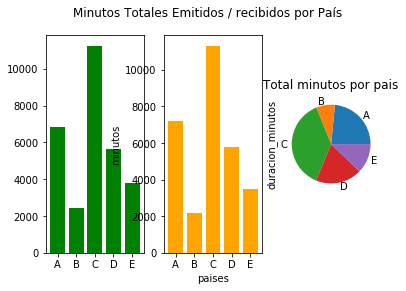

In [23]:
Totales_marginales()

#### 8) Ejercicio voluntario

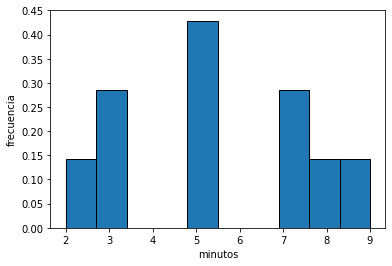

['7:07',
 '9:28',
 '5:32',
 '2:06',
 '5:15',
 '8:34',
 '3:18',
 '5:45',
 '3:42',
 '7:06']

<Figure size 432x288 with 0 Axes>

In [34]:
"""como ejercicio voluntario algunos graficos complementarios y otras funciones generadas en la realizacion del 
# ejercicio

 """
#Algunos graficos sobre el fichero:
#graficos de duraciones de llamada no uniforme
def duracallnounif(y):
    """ 
    Funcion que genera la duracion para cada llamada, siendo el numero de llamadas '(y)',
    en nuestro caso sera de 5000 llamadas que se generaran con un valor central de 5 min y 0-59 segundos de manera 
    no uniforme.
    Ademas de graficar la distribucion de la frecuencia de los minutos de la llamada
    
    Parameters
    ----------
    y= Numero de llamadas a generar
    
    Return
    ----------
    string
    una lista de y valores aleatorios que son duraciones de llamada en minutos y segundos. 
    El grafico archivado en disco
    
    Example - Para el ejercicio generaremos 10:
    -----
    duracallnounif"(0,10)""
    
    ''5:38',
     '5:49',
     '4:02',
     '3:01',
     '1:05',
     '6:17',
     '5:00',
     '6:36',
     '4:48',
     '7:37']'
    """
    minu=(np.random.poisson(lam=5,size=y)) 
    dura=[]
    for i in minu:
        seconds=str(datetime.time(0,0,(random.randint(0,59))))
        #print(type(seconds))
        dura.append(str(i)+":"+str(seconds[6:]))
        
# Generamos graficos de todos los numeros generados aleatoriamente    
    plt.hist(minu, bins=10, alpha=1, density=True, edgecolor = 'black',  linewidth=1)
    plt.ylabel('frecuencia')
    plt.xlabel('minutos')
    plt.show()
    plt.savefig('histograma.duracionllamada.jpg',bbox_inches='tight',dpi=300)
    
    return(dura)
duracallnounif(10)